<IPython.core.display.Javascript object>


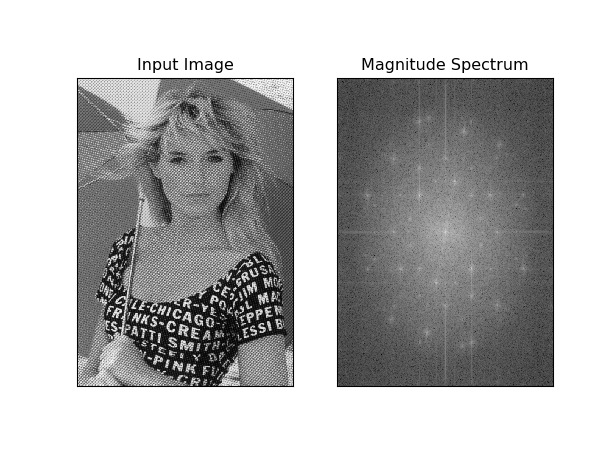

In [12]:
%matplotlib notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('orig.png',0)
img = cv2.imread('FalseMoire.jpg',0)
f = np.fft.fft2(img)
#print(f)
fshift = np.fft.fftshift(f)
#print(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))
#print(magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

815 573
52 42


<IPython.core.display.Javascript object>


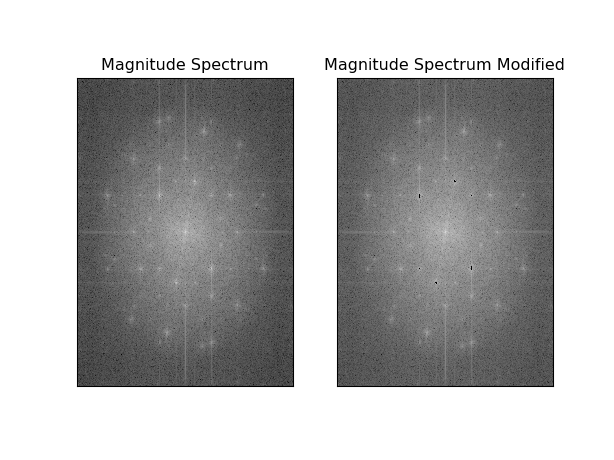

In [24]:
%matplotlib notebook
(x,y) = magnitude_spectrum.shape
magnitude_spectrum_2 = np.copy(magnitude_spectrum)
fshift2 = np.copy(fshift)
print(x,y)
squarex = np.int((x * 0.13)//2)
squarey = np.int((y * 0.15)//2) 
print(squarex,squarey)
for i in range(x):
    for j in range(y):
        if magnitude_spectrum[i,j] > 240:
            fshift2[i,j] = 0
        
        
magnitude_spectrum_2[magnitude_spectrum_2 > 250] = 0
#magnitude_spectrum[magnitude_spectrum_2 > 250] = 0
#magnitude_spectrum_2[x//2-55:x//2+55,y//2-40:y//2+40] = magnitude_spectrum[x//2-55:x//2+55,y//2-40:y//2+40]
magnitude_spectrum_2[x//2-squarex : x//2+squarex, y//2-squarey : y//2+squarey] = magnitude_spectrum[x//2-squarex : x//2+squarex, y//2-squarey : y//2+squarey]
#fshift2[x//2-55:x//2+55,y//2-40:y//2+40] = fshift[x//2-55:x//2+55,y//2-40:y//2+40]
fshift2[x//2-squarex : x//2+squarex, y//2-squarey : y//2+squarey] = fshift[x//2-squarex : x//2+squarex, y//2-squarey : y//2+squarey]

plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_2, cmap = 'gray')
plt.title('Magnitude Spectrum Modified'), plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


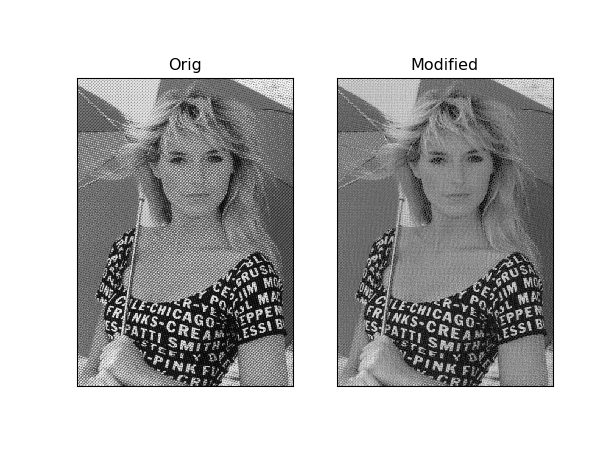

In [25]:
%matplotlib notebook
#print(magnitude_spectrum_2)
f_ishift = np.fft.ifftshift(fshift2)
#print(f_ishift)
img_back = np.fft.ifft2(f_ishift)
#print(img_back)
img_back = np.abs(img_back)
#print(img_back)


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Orig'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Modified'), plt.xticks([]), plt.yticks([])
plt.show()